### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import MaxPool2D

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Collect Fashion mnist data from tf.keras.datasets 

In [3]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


#### Change train and test labels into one-hot vectors

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print('Number of samples in training set: ', X_train.shape[0])
print('Number of samples in test set: ', X_test.shape[0])

Number of samples in training set:  60000
Number of samples in test set:  10000


In [6]:

print('Dimensions of samples in training set: ', X_train.shape[1:])
print('Dimensions of samples in test set: ', X_test.shape[1:])

Dimensions of samples in training set:  (28, 28)
Dimensions of samples in test set:  (28, 28)


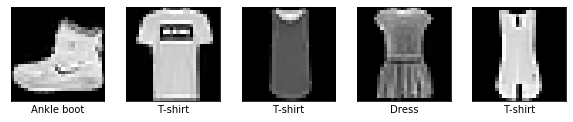

In [7]:

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
y_train_tf = tf.keras.utils.to_categorical(y_train)
y_test_tf = tf.keras.utils.to_categorical(y_test)

In [9]:
y_train_tf[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Build the Graph

#### Initialize model, reshape & normalize data

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
X_train_norm = (X_train/255)
X_test_norm = (X_test/255)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

In [0]:
#  We can reshape using expand dims
x_train_with_dims = tf.keras.backend.expand_dims(X_train_norm,axis=-1)
x_test_with_dims = tf.keras.backend.expand_dims(X_test_norm,axis=-1)

In [0]:
#Initialize Sequential model
model = Sequential()

#normalize data
model.add(BatchNormalization())

#Add first convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add MaxPooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(Flatten())

#Dense layer
model.add(Dense(200, activation='relu'))

#Add another dropout layer
model.add(Dropout(0.25))

#Dense layer
model.add(Dense(100, activation='relu'))

#Add another dropout layer
model.add(Dropout(0.25))

#Output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x_train_with_dims, tf.convert_to_tensor(y_train_tf),          
          validation_data=(x_test_with_dims, tf.convert_to_tensor(y_test_tf)),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4295 - accuracy: 0.8467 - val_loss: 0.2967 - val_accuracy: 0.8885
Epoch 2/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2721 - accuracy: 0.9024 - val_loss: 0.2551 - val_accuracy: 0.9078
Epoch 3/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2171 - accuracy: 0.9212 - val_loss: 0.2385 - val_accuracy: 0.9150
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1825 - accuracy: 0.9323 - val_loss: 0.2339 - val_accuracy: 0.9161
Epoch 5/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1527 - accuracy: 0.9443 - val_loss: 0.2452 - val_accuracy: 0.9186
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1319 - accuracy: 0.9504 - val_loss: 0.2428 - val_accuracy: 0.9238
Epoch 7/10
60000/60000 [==========================

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  921800    
_________________________________________________________________
dropout (Dropout)            multiple                  0

In [25]:
model.evaluate(x_test_with_dims, tf.convert_to_tensor(y_test_tf))

10000/10000 [==============================] - 1s 75us/sample - loss: 0.3069 - accuracy: 0.9233


[0.30689583716243507, 0.9233]

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

print("Please find the classification report as following: \n")
print(classification_report(model.predict_classes(x_test_with_dims), y_test))
 

Please find the classification report as following: 

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       965
           1       0.98      0.99      0.99       984
           2       0.85      0.91      0.88       936
           3       0.93      0.90      0.92      1030
           4       0.91      0.87      0.89      1041
           5       0.99      0.98      0.99      1004
           6       0.80      0.77      0.79      1033
           7       0.97      0.96      0.97      1014
           8       0.99      0.98      0.98      1009
           9       0.96      0.98      0.97       984

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [27]:
print("Please find the confusion matrix as following: \n")
print(confusion_matrix(model.predict_classes(x_test_with_dims), y_test))   

Please find the confusion matrix as following: 

[[861   0  12  16   2   0  72   0   2   0]
 [  1 978   0   3   0   0   1   0   1   0]
 [ 21   0 848   7  21   0  37   0   1   1]
 [ 12  17   9 932  29   0  27   0   4   0]
 [  5   0  57  16 907   0  54   0   2   0]
 [  1   0   0   0   0 988   0   9   1   5]
 [ 93   2  72  26  41   0 798   0   1   0]
 [  0   0   0   0   0   9   0 972   1  32]
 [  6   3   2   0   0   0  11   0 987   0]
 [  0   0   0   0   0   3   0  19   0 962]]


In [18]:
for i in range(len(class_names)):
    print("class {} represent {}".format(i, class_names[i]))

class 0 represent T-shirt
class 1 represent Trouser
class 2 represent Pullover
class 3 represent Dress
class 4 represent Coat
class 5 represent Sandal
class 6 represent Shirt
class 7 represent Sneaker
class 8 represent Bag
class 9 represent Ankle boot


Following are the observation from the above assignment:
- From the classification you can see the most of the classes have f1 score near to 1
- For the classes Shirt, T-shirt and dress networ is making most of the mistakes.
- need to have variation in the data for the above three class so that it can distinguish more preciesly
- Data augmentation might help in this case to achieve the same.
- From confusion matrix we can se most number wrong prediction comes from these cases for example, for the T-shirt it have predicted Dress almost for 93 images which is big error.